In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import statsmodels.api as sm

In [171]:
#Function to create scatterplot

def plot_scatter_with_pearson(df, x_vars, y_var):
    # Define a function to calculate and display Pearson's r
    def annotate(data, x, y, ax):
        # Replace NaN values with 0 before computing Pearson's r
        valid_data = data[[x, y]].fillna(0)
        r, _ = pearsonr(valid_data[x], valid_data[y])
        ax.text(.05, .95, f'Pearson\'s r = {r:.2f}', transform=ax.transAxes, fontsize=10,
                verticalalignment='top')

    # Create a long-format DataFrame for FacetGrid
    long_df = pd.melt(df, id_vars=[y_var], value_vars=x_vars, var_name='variable', value_name='value')

    # Create the FacetGrid
    g = sns.FacetGrid(long_df, col="variable", col_wrap=4, height=3, sharex=False, sharey=False)

    # Map the scatterplot to the grid
    g.map(sns.scatterplot, 'value', y_var, s=10)

    # Apply the annotation
    for ax, x_var in zip(g.axes.flat, x_vars):
        annotate(df, x_var, y_var, ax)

    # Manually adjust the layout
    g.fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.show()

In [388]:
ct_data = pd.read_csv("GIS Analysis/census_variables/ct/ct_data_v2.csv")
ct_data = ct_data.drop(columns=["Unnamed: 0", "geometry"])
ct_data.head()

id  Popu_2021  PopuDenPerKM  Immigrant%     VM%  1-ParentFam%  \
0  5350001.0        599          87.8       1.695  31.356        14.286   
1  5350002.0        604         178.0       0.000   1.667        17.143   
2  5350003.0        457         483.3      14.423  52.381         8.333   
3  5350004.0       6306       18525.3       8.975  50.550        25.000   
4  5350005.0       6957       18483.0       6.389  47.697        24.161   

     MBM%    LIM%   Neet%    %CHN  %Affordable   %ofWP  ShortTerm%  \
0   9.322  13.115  23.077  27.273       27.273   7.500       4.545   
1  13.333  15.686  20.000  50.000       50.000  15.789      17.857   
2   6.731  11.364   0.000   0.000        0.000   6.667      12.069   
3  23.942  31.749  23.611  44.154       32.112  10.704      10.243   
4  17.175  28.473  17.629  30.651       29.119   9.444       9.613   

   Equity Index  Own_count       Own%  Rent_count       Rent%  Unknown_count  \
0      0.326619          5  33.333333          10   66.666667              0   
1      0.617931          0   0.000000           2  100.000000              0   
2      0.214454          3  37.500000           5   62.500000              0   
3      0.716577          3  27.272727           8   72.727273              0   
4      0.558658          3  27.272727           8   72.727273              0   

   Total_count  
0           15  
1            2  
2            8  
3           11  
4           11

### 0. Correlations among variables

In [458]:
test = ct_data.drop(columns=['id', 'Popu_2021', 'Equity Index', 'Own_count', 'Own%', 'Rent_count', 'Rent%',
       'Unknown_count'])
correlation = test.corr()

<Axes: >

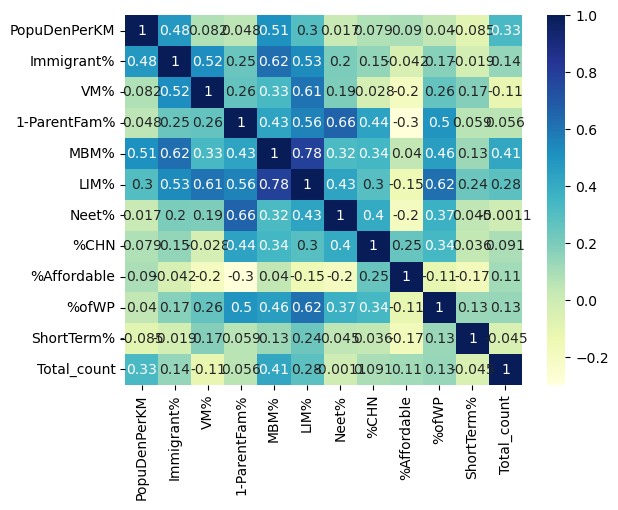

In [460]:
correlation_plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)
correlation_plot

### 1. Small Multiple Scatterplots (y = total spre count)

In [183]:
ct_1= ct_data[['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%' ,"Equity Index", "Total_count"]].copy()
ct_1

PopuDenPerKM  Immigrant%     VM%  1-ParentFam%    MBM%    LIM%   Neet%  \
0             87.8       1.695  31.356        14.286   9.322  13.115  23.077   
1            178.0       0.000   1.667        17.143  13.333  15.686  20.000   
2            483.3      14.423  52.381         8.333   6.731  11.364   0.000   
3          18525.3       8.975  50.550        25.000  23.942  31.749  23.611   
4          18483.0       6.389  47.697        24.161  17.175  28.473  17.629   
...            ...         ...     ...           ...     ...     ...     ...   
1060        2586.9       4.406  67.617        11.338   4.093  12.665  10.396   
1061          46.0       0.913  20.432         9.642   3.987   9.416  17.857   
1062          37.0       0.975  13.552         9.329   4.694   9.765  14.085   
1063        1844.8       2.468  59.610        14.831   2.853  11.340   9.353   
1064        2380.6       2.106  45.280        12.422   2.839   9.324  11.828   

        %CHN  %Affordable   %ofWP  ShortTerm%  Equity Index  Total_count  
0     27.273       27.273   7.500       4.545      0.326619           15  
1     50.000       50.000  15.789      17.857      0.617931            2  
2      0.000        0.000   6.667      12.069      0.214454            8  
3     44.154       32.112  10.704      10.243      0.716577           11  
4     30.651       29.119   9.444       9.613      0.558658           11  
...      ...          ...     ...         ...           ...          ...  
1060  10.714       21.429   0.000       9.261      0.222439            0  
1061  40.000       42.857   3.745       9.110      0.319824            1  
1062  31.250       33.333   4.580      12.086      0.288680            2  
1063   0.000        0.000   3.955       9.497      0.145968            1  
1064   0.000       27.586   3.937       9.780      0.195065            0  

[1065 rows x 13 columns]

In [185]:
x_vars = ct_1.columns[:12]
y_var = ct_1.columns[-1]

C:\Users\teres\anaconda3\envs\gis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


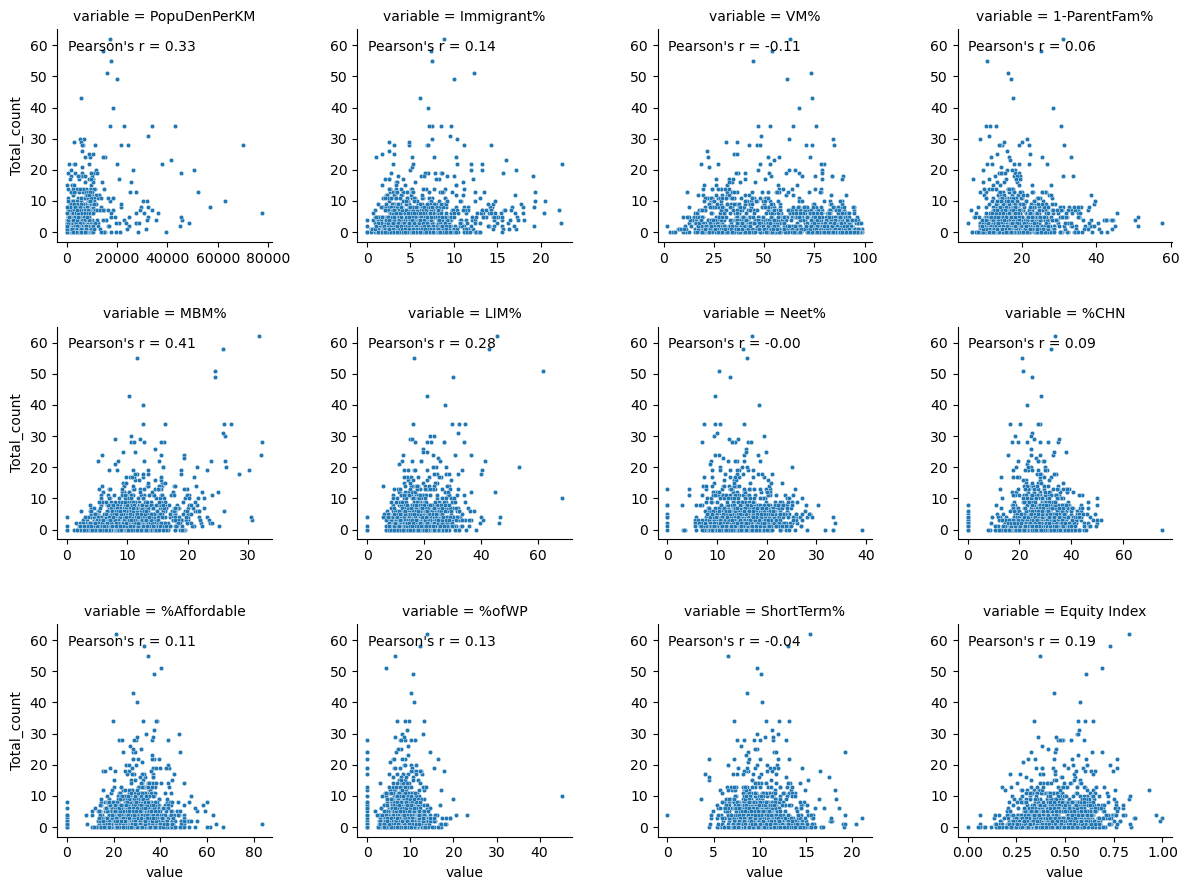

In [187]:
plot_scatter_with_pearson(ct_1, x_vars, y_var)

In [267]:
def linear_regression_coefficients(df, dependent_var, independent_vars):
    # Add a constant to the independent variables (for the intercept)
    X = df[independent_vars]
    X = sm.add_constant(X)
    
    # Define the dependent variable
    y = df[dependent_var]
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Get the coefficients and their p-values
    coefficients = model.params
    p_values = model.pvalues
    
    # Combine the coefficients and p-values into a DataFrame
    result_table = pd.DataFrame({
        'Coefficient': coefficients,
        'P-value': p_values
    })
    
    # Sort the result table by the absolute value of coefficients in descending order
    result_table['Abs Coefficient'] = result_table['Coefficient'].abs()
    result_table = result_table.sort_values(by='Abs Coefficient', ascending=False)
    
    # Drop the 'Abs Coefficient' column before returning the result
    result_table = result_table.drop(columns='Abs Coefficient')
    
    # Add '**' to significant p-values
    result_table['P-value'] = result_table['P-value'].apply(lambda x: f'{x:.4f}**' if x < 0.05 else f'{x:.4f}')
    
    return result_table

In [271]:
ct_1= ct_data[['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%', 'Total_count']].copy()
ct_1 = ct_1.fillna(0)

independent_vars = ['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%']

In [273]:
linear_regression_coefficients(ct_1, 'Total_count', independent_vars)

Coefficient   P-value
const            5.324144  0.0000**
MBM%             0.423533  0.0000**
LIM%             0.417296  0.0000**
ShortTerm%      -0.233998  0.0019**
Immigrant%      -0.165284  0.0222**
Neet%           -0.111485  0.0195**
%ofWP           -0.108181    0.0803
VM%             -0.101724  0.0000**
1-ParentFam%    -0.075008    0.0538
%CHN            -0.043209    0.0577
%Affordable      0.030121    0.1237
PopuDenPerKM     0.000097  0.0010**

In [456]:
#linear model with selected variables

lm2 = ct_data[['Immigrant%', '1-ParentFam%','LIM%', '%Affordable', '%ofWP', 'ShortTerm%', 'Total_count']].copy()
lm2 = lm2.fillna(0)
independent_vars = ['Immigrant%', '1-ParentFam%','LIM%', '%Affordable', '%ofWP', 'ShortTerm%']

linear_regression_coefficients(lm2, 'Total_count', independent_vars)

Coefficient   P-value
const            1.179015    0.3399
LIM%             0.442639  0.0000**
ShortTerm%      -0.341205  0.0000**
Immigrant%      -0.118529    0.0667
1-ParentFam%    -0.112679  0.0013**
%ofWP           -0.087900    0.1961
%Affordable      0.080679  0.0000**

### 2. Small Multiples Regplot (y= rent%)

In [108]:
ct_data.head()

id  Popu_2021  PopuDenPerKM  Immigrant%     VM%  1-ParentFam%  \
0  5350001.0        599          87.8       1.695  31.356        14.286   
1  5350002.0        604         178.0       0.000   1.667        17.143   
2  5350003.0        457         483.3      14.423  52.381         8.333   
3  5350004.0       6306       18525.3       8.975  50.550        25.000   
4  5350005.0       6957       18483.0       6.389  47.697        24.161   

     MBM%    LIM%   Neet%    %CHN  %Affordable   %ofWP  ShortTerm%  \
0   9.322  13.115  23.077  27.273       27.273   7.500       4.545   
1  13.333  15.686  20.000  50.000       50.000  15.789      17.857   
2   6.731  11.364   0.000   0.000        0.000   6.667      12.069   
3  23.942  31.749  23.611  44.154       32.112  10.704      10.243   
4  17.175  28.473  17.629  30.651       29.119   9.444       9.613   

   Equity Index  Own_count       Own%  Rent_count       Rent%  Unknown_count  \
0      0.326619          5  33.333333          10   66.666667              0   
1      0.617931          0   0.000000           2  100.000000              0   
2      0.214454          3  37.500000           5   62.500000              0   
3      0.716577          3  27.272727           8   72.727273              0   
4      0.558658          3  27.272727           8   72.727273              0   

   Total_count  
0           15  
1            2  
2            8  
3           11  
4           11

In [229]:
ct_data["Rent%"].median()

64.70588235294117

In [231]:
ct_3= ct_data[['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%',"Equity Index", "Rent%"]].copy()
ct_3["Rent%"] = ct_3["Rent%"].apply(lambda x: 0 if x > 64 else 1)
ct_3

PopuDenPerKM  Immigrant%     VM%  1-ParentFam%    MBM%    LIM%   Neet%  \
0             87.8       1.695  31.356        14.286   9.322  13.115  23.077   
1            178.0       0.000   1.667        17.143  13.333  15.686  20.000   
2            483.3      14.423  52.381         8.333   6.731  11.364   0.000   
3          18525.3       8.975  50.550        25.000  23.942  31.749  23.611   
4          18483.0       6.389  47.697        24.161  17.175  28.473  17.629   
...            ...         ...     ...           ...     ...     ...     ...   
1060        2586.9       4.406  67.617        11.338   4.093  12.665  10.396   
1061          46.0       0.913  20.432         9.642   3.987   9.416  17.857   
1062          37.0       0.975  13.552         9.329   4.694   9.765  14.085   
1063        1844.8       2.468  59.610        14.831   2.853  11.340   9.353   
1064        2380.6       2.106  45.280        12.422   2.839   9.324  11.828   

        %CHN  %Affordable   %ofWP  ShortTerm%  Equity Index  Rent%  
0     27.273       27.273   7.500       4.545      0.326619      0  
1     50.000       50.000  15.789      17.857      0.617931      0  
2      0.000        0.000   6.667      12.069      0.214454      1  
3     44.154       32.112  10.704      10.243      0.716577      0  
4     30.651       29.119   9.444       9.613      0.558658      0  
...      ...          ...     ...         ...           ...    ...  
1060  10.714       21.429   0.000       9.261      0.222439      1  
1061  40.000       42.857   3.745       9.110      0.319824      1  
1062  31.250       33.333   4.580      12.086      0.288680      1  
1063   0.000        0.000   3.955       9.497      0.145968      0  
1064   0.000       27.586   3.937       9.780      0.195065      1  

[1065 rows x 13 columns]

In [241]:
def plot_logistic_regressions(df, y_var):
    # Number of x-variables
    x_vars = [col for col in df.columns if col != y_var]
    num_vars = len(x_vars)
    
    # Determine the grid size
    cols = 4
    rows = (num_vars + cols - 1) // cols
    
    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    axes = axes.flatten()

    for i, x_var in enumerate(x_vars):
        ax = axes[i]
        sns.regplot(x=x_var, y=y_var, data=df, logistic=True, ax=ax)
        ax.set_title(f'{x_var} vs {y_var}')
    
    # Remove empty subplots
    for i in range(num_vars, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

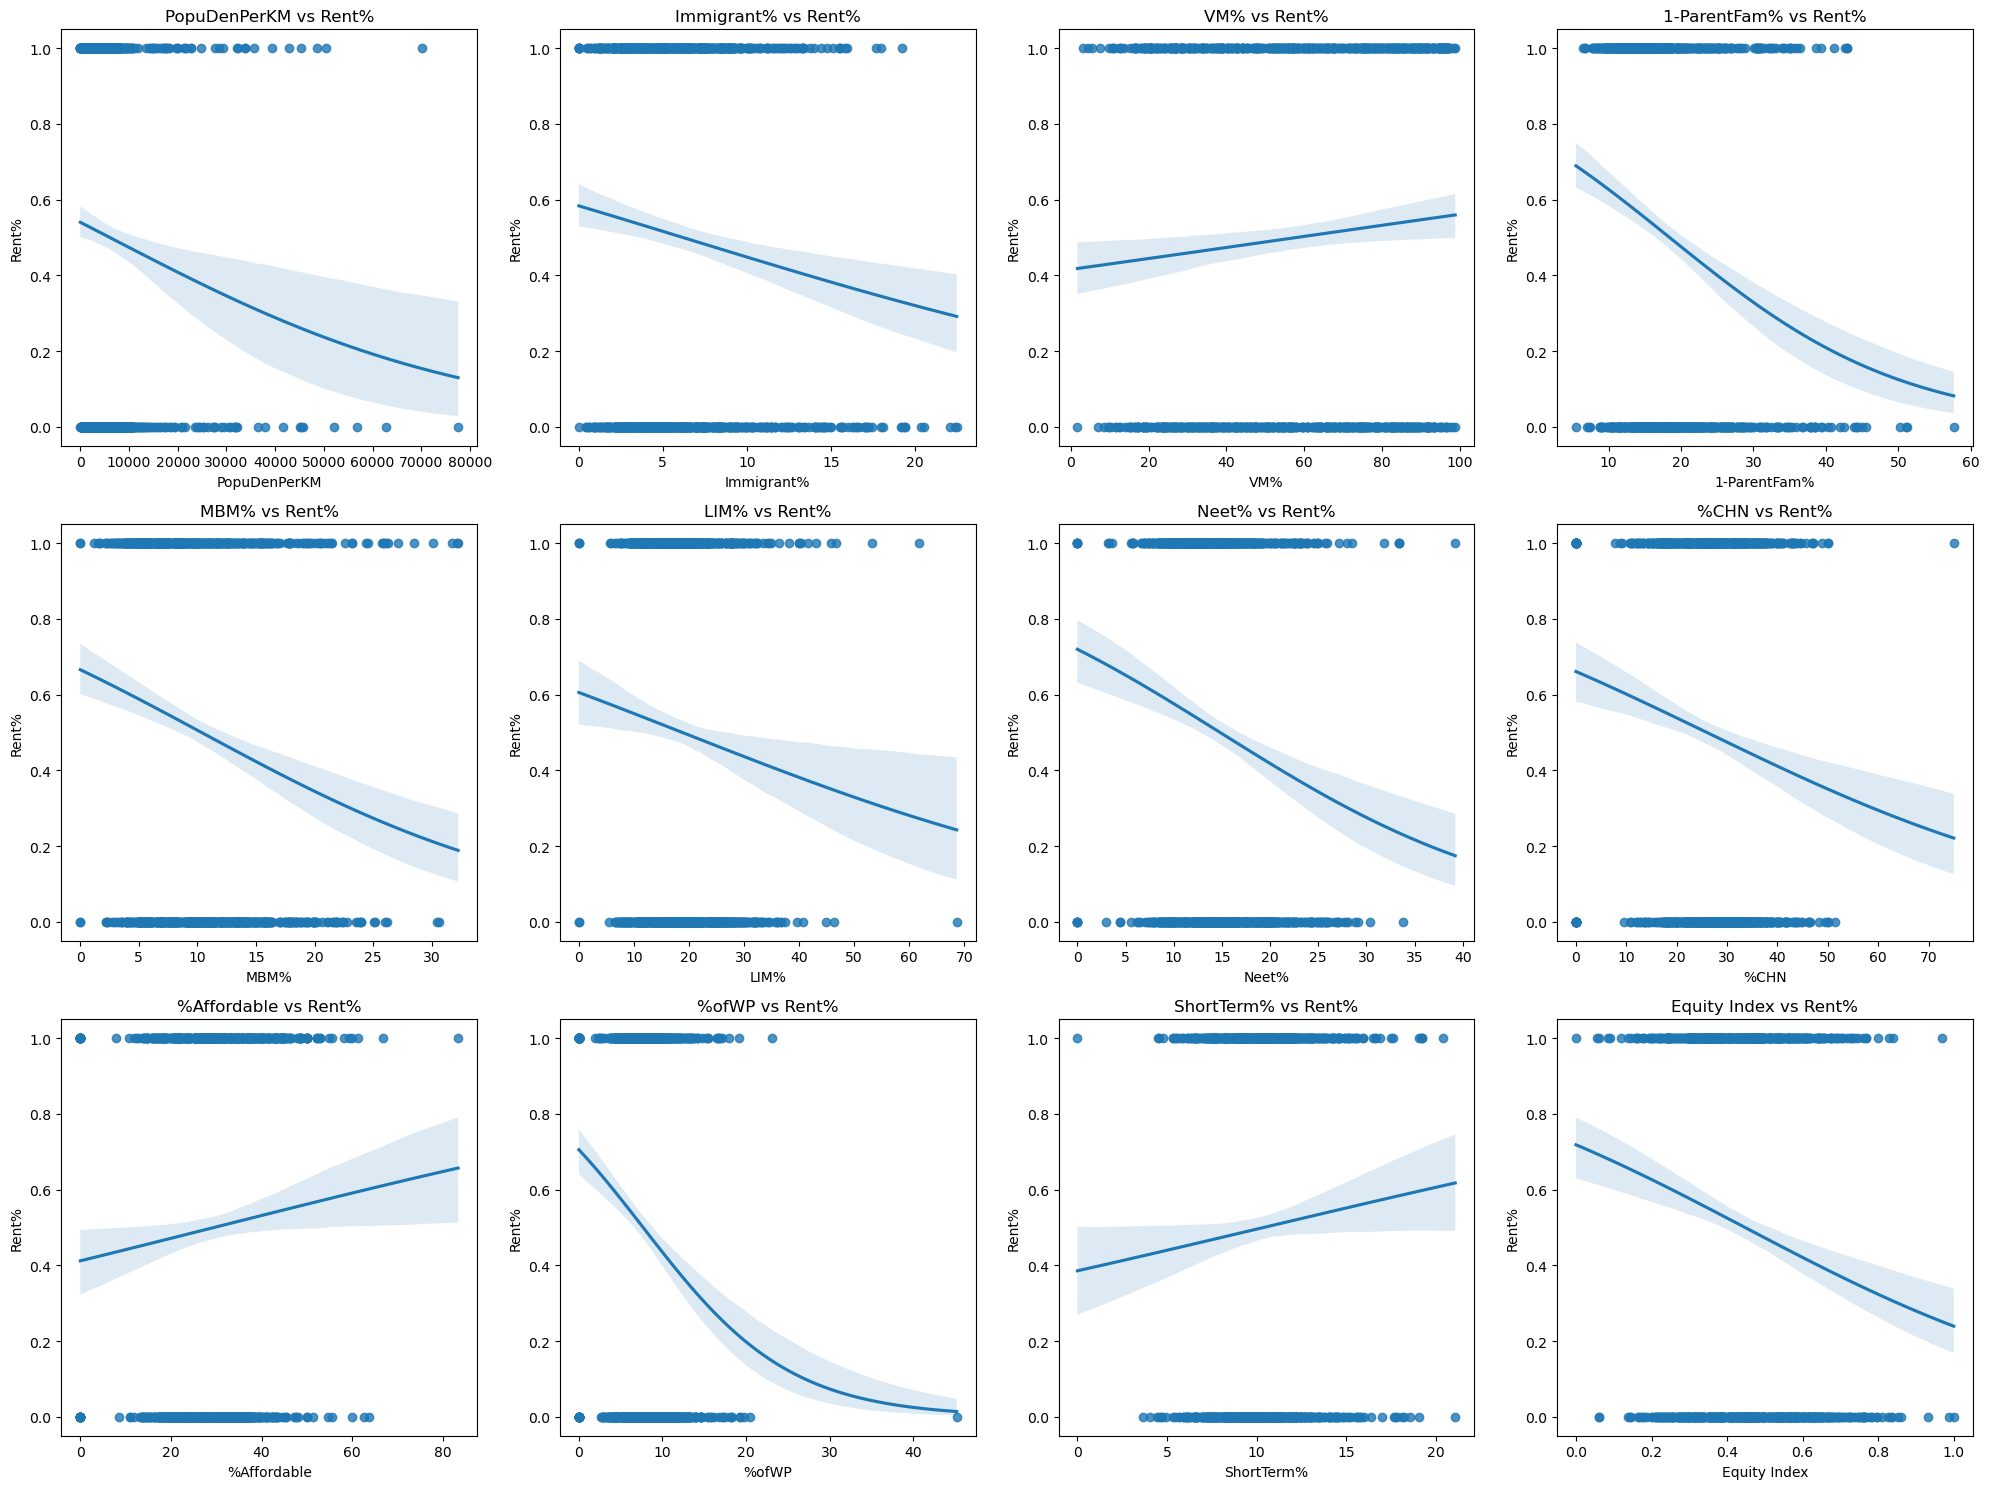

In [243]:
plot_logistic_regressions(ct_3, "Rent%")

In [261]:
def logistic_regression_coefficients(df, dependent_var, independent_vars):
    # Add a constant to the independent variables (for the intercept)
    X = df[independent_vars]
    X = sm.add_constant(X)
    
    # Define the dependent variable
    y = df[dependent_var]
    
    # Fit the logistic regression model
    model = sm.Logit(y, X).fit()
    
    # Get the coefficients and their p-values
    coefficients = model.params
    p_values = model.pvalues
    
    # Combine the coefficients and p-values into a DataFrame
    result_table = pd.DataFrame({
        'Coefficient': coefficients,
        'P-value': p_values
    })
    
    # Sort the result table by the absolute value of coefficients in descending order
    result_table['Abs Coefficient'] = result_table['Coefficient'].abs()
    result_table = result_table.sort_values(by='Abs Coefficient', ascending=False)
    
    # Drop the 'Abs Coefficient' column before returning the result
    result_table = result_table.drop(columns='Abs Coefficient')
    
    # Add '**' to significant p-values
    result_table['P-value'] = result_table['P-value'].apply(lambda x: f'{x:.4f}**' if x < 0.05 else f'{x:.4f}')
    
    return result_table

In [472]:
ct_4= ct_data[['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%', "Rent%"]].copy()
ct_4["Rent%"] = ct_4["Rent%"]/100
ct_4=ct_4.fillna(0)
independent_vars = ['PopuDenPerKM', 'Immigrant%', 'VM%', '1-ParentFam%','MBM%', 'LIM%', 'Neet%', '%CHN', '%Affordable', '%ofWP', 'ShortTerm%']

In [474]:
logistic_regression_coefficients(ct_4, "Rent%", independent_vars)

Optimization terminated successfully.
         Current function value: 0.607082
         Iterations 5


Coefficient   P-value
MBM%             0.098703  0.0003**
%ofWP            0.094862  0.0001**
LIM%            -0.063095  0.0072**
Immigrant%       0.057462  0.0388**
const           -0.055369    0.8995
1-ParentFam%     0.043923  0.0036**
ShortTerm%      -0.029472    0.2934
VM%             -0.016608  0.0001**
%Affordable     -0.008770    0.2269
Neet%            0.000173    0.9923
%CHN            -0.000107    0.9899
PopuDenPerKM     0.000005    0.6562

In [470]:
log2 = ct_data[['Immigrant%', '1-ParentFam%','LIM%', '%Affordable', '%ofWP', 'ShortTerm%', 'Rent%']].copy()
log2 = log2.fillna(0)
log2["Rent%"] = log2["Rent%"]/100
independent_vars = ['Immigrant%', '1-ParentFam%','LIM%', '%Affordable', '%ofWP', 'ShortTerm%']

logistic_regression_coefficients(log2, "Rent%", independent_vars)

Optimization terminated successfully.
         Current function value: 0.644037
         Iterations 5


Coefficient   P-value
const           -0.686016    0.0887
%ofWP            0.093970  0.0000**
Immigrant%       0.064441  0.0028**
1-ParentFam%     0.051409  0.0000**
LIM%            -0.044800  0.0041**
ShortTerm%      -0.040444    0.1361
%Affordable      0.002918    0.6377

### 3. Average count of SPRE by Equity Index Quintile

In [362]:
def quintile_mean(df, quintile_col, count_col):
    # Calculate quintiles
    df['quintile'] = pd.qcut(df[quintile_col], 5, labels=False) + 1
    
    # Group by quintile and count_col to get the counts
    quintile_counts = df.groupby(by=['quintile']).mean().reset_index()
    
    return quintile_counts

In [364]:
total_average = quintile_mean(ct_data, "Equity Index", "Total_count")

In [368]:
#Average of total spre count

total_average = total_average[["quintile", "Total_count"]].copy().rename(columns={"Total_count":"Avg_spre_count"})
total_average

quintile  Avg_spre_count
0         1        3.173709
1         2        4.422535
2         3        4.596244
3         4        5.647887
4         5        6.882629

In [346]:
#Average of leased locations

leased_average = quintile_mean(ct_data, "Equity Index", "Rent_count")

In [350]:
leased_average = leased_average[["quintile", "Rent_count"]].copy().rename(columns={"Rent_count":"Avg_leased_spre_count"})
leased_average

quintile  Avg_leased_spre_count
0         1               2.338028
1         2               2.990610
2         3               3.384977
3         4               3.924883
4         5               4.751174

In [356]:
#Average of owned locations

owned_average = quintile_mean(ct_data, "Equity Index", 'Own_count')

In [358]:
owned_average = owned_average[["quintile", "Own_count"]].copy().rename(columns={"Own_count":"Avg_owned_spre_count"})
owned_average

quintile  Avg_owned_spre_count
0         1              0.704225
1         2              1.159624
2         3              1.079812
3         4              1.446009
4         5              1.661972

In [374]:
df1 = pd.concat([total_average, leased_average], axis=1)
average_table = pd.concat([df1, owned_average], axis=1)

quintile  Avg_spre_count  quintile  Avg_leased_spre_count  quintile  \
0         1        3.173709         1               2.338028         1   
1         2        4.422535         2               2.990610         2   
2         3        4.596244         3               3.384977         3   
3         4        5.647887         4               3.924883         4   
4         5        6.882629         5               4.751174         5   

   Avg_owned_spre_count  
0              0.704225  
1              1.159624  
2              1.079812  
3              1.446009  
4              1.661972

### 4. Weighted average of spre count of low income population

In [420]:
ct_data4 = ct_data

id  Popu_2021  PopuDenPerKM  Immigrant%     VM%  1-ParentFam%  \
0     5350001.00        599          87.8       1.695  31.356        14.286   
1     5350002.00        604         178.0       0.000   1.667        17.143   
2     5350003.00        457         483.3      14.423  52.381         8.333   
3     5350004.00       6306       18525.3       8.975  50.550        25.000   
4     5350005.00       6957       18483.0       6.389  47.697        24.161   
...          ...        ...           ...         ...     ...           ...   
1060  5350586.05       9563        2586.9       4.406  67.617        11.338   
1061  5350587.01       6072          46.0       0.913  20.432         9.642   
1062  5350587.02       5640          37.0       0.975  13.552         9.329   
1063  5350802.01       4011        1844.8       2.468  59.610        14.831   
1064  5350802.02       5373        2380.6       2.106  45.280        12.422   

        MBM%    LIM%   Neet%    %CHN  %Affordable   %ofWP  ShortTerm%  \
0      9.322  13.115  23.077  27.273       27.273   7.500       4.545   
1     13.333  15.686  20.000  50.000       50.000  15.789      17.857   
2      6.731  11.364   0.000   0.000        0.000   6.667      12.069   
3     23.942  31.749  23.611  44.154       32.112  10.704      10.243   
4     17.175  28.473  17.629  30.651       29.119   9.444       9.613   
...      ...     ...     ...     ...          ...     ...         ...   
1060   4.093  12.665  10.396  10.714       21.429   0.000       9.261   
1061   3.987   9.416  17.857  40.000       42.857   3.745       9.110   
1062   4.694   9.765  14.085  31.250       33.333   4.580      12.086   
1063   2.853  11.340   9.353   0.000        0.000   3.955       9.497   
1064   2.839   9.324  11.828   0.000       27.586   3.937       9.780   

      Equity Index  Own_count        Own%  Rent_count       Rent%  \
0         0.326619          5   33.333333          10   66.666667   
1         0.617931          0    0.000000           2  100.000000   
2         0.214454          3   37.500000           5   62.500000   
3         0.716577          3   27.272727           8   72.727273   
4         0.558658          3   27.272727           8   72.727273   
...            ...        ...         ...         ...         ...   
1060      0.222439          0    0.000000           0    0.000000   
1061      0.319824          1  100.000000           0    0.000000   
1062      0.288680          1   50.000000           1   50.000000   
1063      0.145968          0    0.000000           1  100.000000   
1064      0.195065          0    0.000000           0    0.000000   

      Unknown_count  Total_count  
0                 0           15  
1                 0            2  
2                 0            8  
3                 0           11  
4                 0           11  
...             ...          ...  
1060              0            0  
1061              0            1  
1062              0            2  
1063              0            1  
1064              0            0  

[1065 rows x 20 columns]

In [416]:
def popu_weighted_count(df, popu_col, equity_percent, spre_count_col):
    
    numerator = df[popu_col]*(df[equity_percent]/100)*df[spre_count_col]
    sum_numerator = numerator.sum(skipna=True, numeric_only=False)
    denominator = df[popu_col]*(df[equity_percent]/100)
    sum_denominator = denominator.sum(skipna=True, numeric_only=False)
    result = sum_numerator/sum_denominator
    
    r_numerator = df[popu_col]*(1-(df[equity_percent]/100))*df[spre_count_col]
    r_sum_numerator = r_numerator.sum(skipna=True, numeric_only=False)
    r_denominator = df[popu_col]*(1-(df[equity_percent]/100))
    r_sum_denominator = r_denominator.sum(skipna=True, numeric_only=False)
    reverse_result = r_sum_numerator/r_sum_denominator
    return result, reverse_result

In [434]:
counts = ['Own_count', 'Rent_count', 'Unknown_count', 'Total_count']
cols = ['Immigrant%', 'VM%', '1-ParentFam%', 'MBM%', 'LIM%', 'Neet%', 
        '%CHN', '%Affordable', '%ofWP', 'ShortTerm%']

list_wt = []
for count in counts:
    for col in cols: 
        wt, rev_wt = popu_weighted_count(ct_data4, 'Popu_2021', col, count)
        list_wt.append([col, count, wt])
        list_wt.append(["R-" + col, count, rev_wt])

weighted_count = pd.DataFrame(list_wt, columns=["Equity Variable", "Count Type", "Weighted Count"])

In [440]:
#Pivot the table to wide form for easier comparison
weighted_count_wide = weighted_count.pivot(index="Count Type", 
                                     columns="Equity Variable", values="Weighted Count")
weighted_count_wide

Equity Variable  %Affordable      %CHN     %ofWP  1-ParentFam%  Immigrant%  \
Count Type                                                                   
Own_count           1.380863  1.267033  1.340621      1.237677    1.322009   
Rent_count          3.650472  3.749824  3.921766      3.747368    4.114144   
Total_count         5.335137  5.301925  5.560010      5.283116    5.778585   
Unknown_count       0.303802  0.285067  0.297623      0.298071    0.342432   

Equity Variable      LIM%      MBM%     Neet%  R-%Affordable    R-%CHN  \
Count Type                                                               
Own_count        1.533013  1.736407  1.203188       1.206046  1.254952   
Rent_count       4.038358  4.491278  3.624051       3.513459  3.484251   
Total_count      5.958843  6.662964  5.103258       4.995404  5.023110   
Unknown_count    0.387472  0.435279  0.276018       0.275899  0.283907   

Equity Variable   R-%ofWP  R-1-ParentFam%  R-Immigrant%    R-LIM%    R-MBM%  \
Count Type                                                                    
Own_count        1.251217        1.262807      1.253651  1.192620  1.201416   
Rent_count       3.523453        3.510847      3.514650  3.438905  3.443161   
Total_count      5.057759        5.054759      5.048398  4.891127  4.910874   
Unknown_count    0.283088        0.281105      0.280097  0.259601  0.266297   

Equity Variable   R-Neet%  R-ShortTerm%     R-VM%  ShortTerm%       VM%  
Count Type                                                               
Own_count        1.267711      1.257858  1.401232    1.261034  1.158745  
Rent_count       3.542131      3.565441  3.901578    3.456914  3.313037  
Total_count      5.095483      5.107732  5.597292    5.000375  4.748882  
Unknown_count    0.285641      0.284432  0.294481    0.282428  0.277101

In [452]:
sorted_columns = sorted(weighted_count_wide.columns, key=lambda x: x if not x.startswith("R-") else x[2:] + "-r")
weighted_count_wide[sorted_columns]

Equity Variable  %Affordable  R-%Affordable      %CHN    R-%CHN     %ofWP  \
Count Type                                                                  
Own_count           1.380863       1.206046  1.267033  1.254952  1.340621   
Rent_count          3.650472       3.513459  3.749824  3.484251  3.921766   
Total_count         5.335137       4.995404  5.301925  5.023110  5.560010   
Unknown_count       0.303802       0.275899  0.285067  0.283907  0.297623   

Equity Variable   R-%ofWP  1-ParentFam%  R-1-ParentFam%  Immigrant%  \
Count Type                                                            
Own_count        1.251217      1.237677        1.262807    1.322009   
Rent_count       3.523453      3.747368        3.510847    4.114144   
Total_count      5.057759      5.283116        5.054759    5.778585   
Unknown_count    0.283088      0.298071        0.281105    0.342432   

Equity Variable  R-Immigrant%      LIM%    R-LIM%      MBM%    R-MBM%  \
Count Type                                                              
Own_count            1.253651  1.533013  1.192620  1.736407  1.201416   
Rent_count           3.514650  4.038358  3.438905  4.491278  3.443161   
Total_count          5.048398  5.958843  4.891127  6.662964  4.910874   
Unknown_count        0.280097  0.387472  0.259601  0.435279  0.266297   

Equity Variable     Neet%   R-Neet%  ShortTerm%  R-ShortTerm%       VM%  \
Count Type                                                                
Own_count        1.203188  1.267711    1.261034      1.257858  1.158745   
Rent_count       3.624051  3.542131    3.456914      3.565441  3.313037   
Total_count      5.103258  5.095483    5.000375      5.107732  4.748882   
Unknown_count    0.276018  0.285641    0.282428      0.284432  0.277101   

Equity Variable     R-VM%  
Count Type                 
Own_count        1.401232  
Rent_count       3.901578  
Total_count      5.597292  
Unknown_count    0.294481